In [1]:
#import packages
import isotopylog as ipl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('./datasets/Thermal_History.csv')

# 提取四个变量
time = df['Time/Myr'].values
avg_temp = df['Avg_T/Celsius'].values
min_temp = df['Min_T/Celsius'].values
max_temp = df['Max_T/Celsius'].values

# 查看提取的变量
print(time[:5], avg_temp[:5], min_temp[:5], max_temp[:5])

[0.  0.5 1.  1.5 2. ] [9.0371  9.15151 9.23004 9.30687 9.38019] [-1.69277  0.       0.       0.       0.     ] [19.767 17.    17.    17.    17.   ]


In [5]:
import math
from scipy.optimize import newton

# Like Guo et al., 2022 "碳酸盐成岩作用中的团簇同位素地球化学研究进展", "矿物岩石地球化学通报", if we can know the strata temprature varations
old_time = time[::-1]
delta47_init = 0.52

# 定义方程
def equation(delta47_t, T, t):
    """
    @Note: In Passey and Henkes, 2012, EPSL, the thermal dynamic units are ℃
    """
    delta47_eq = (-3.407 * (1e9)) / (T ** 4) + (2.365 * (1e7)) / (T ** 3) - (2.607 * (1e3)) / (T ** 2) - 5.880 / T + 0.280
    ln_expr = math.log((delta47_t - delta47_eq) / (delta47_init - delta47_eq))
    ln_k = -22.9 * 1000 / T + 22.3
    return - math.exp(ln_k) * (t * 100 *10000 * 365 * 24 * 60 / 1000) - ln_expr

# 循环模拟
delta47_t_list = []
max_iter = 1000  # 设置最大迭代次数
for i in range(len(avg_temp)):
    # 使用牛顿法求解方程的根
    delta47_t = newton(equation, delta47_init, args=(avg_temp[i], 25), maxiter=max_iter)
    delta47_t_list.append(delta47_t)
    delta47_init = delta47_t

print(delta47_t_list)

[0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52]


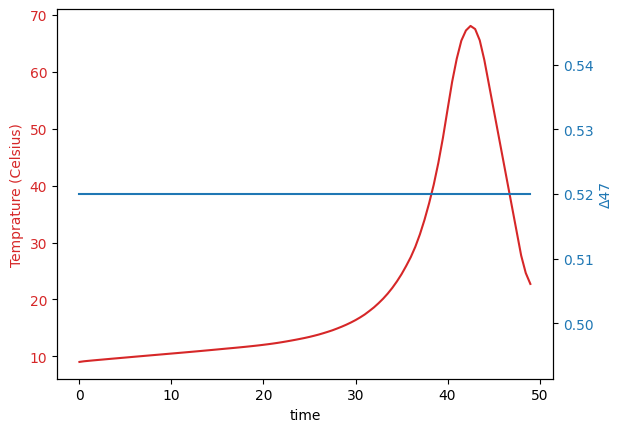

In [8]:
import matplotlib.pyplot as plt

# 绘图
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Temprature (Celsius)', color=color)
ax1.plot(time, avg_temp, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Δ47', color=color)  
ax2.plot(time, delta47_t_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)